In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import pickle

### the distribution of the number of fan-out follows pois(2)

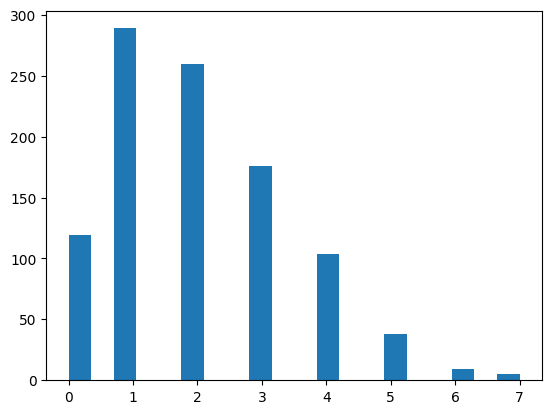

In [34]:
# seed the random number generator
np.random.seed(2023)
s = np.random.poisson(lam=2, size=1000)

count, bins, ignored = plt.hist(s, 20)

# Plot the distribution curve
plt.show()

### create graph
- graph fan out count follows poisson of lambda = 2
- Roughly 400 nodes, 200 leaves

In [35]:
edgeList = [[]]
pointer = 0

# continue adding nodes 
while len(edgeList) - pointer < 200 and pointer < len(edgeList):
    # add child nodes
    # connect the nodes
    childNum = s[pointer]
    edgeNum = len(edgeList)
    for i in range(childNum):
        edgeList.append([])
        edgeList[pointer].append(edgeNum+i)

    pointer += 1

### Create 10 Traces

In [40]:
# create a list of unique 10 traces
traces = set()
while len(traces) < 10:
    # end the trace when the node has no child
    trace = [0]
    node = 0
    while len(edgeList[node]) > 0:
        node = random.choice(edgeList[node])
        trace.append(node)
    
    # add the trace to the set if it is of length 9
    if len(trace) == 9:
        traces.add(tuple(trace))

# convert the traces to pytorch tensor
traces = torch.tensor(list(traces), dtype=torch.float32)


### Convert to Adjacency Matrix

In [41]:
adjacencyMatrix = np.zeros((len(edgeList), len(edgeList)))
for i in range(len(edgeList)):
    for j in edgeList[i]:
        adjacencyMatrix[i][j] = 1
        
# to tensor
adjacencyMatrix = torch.tensor(adjacencyMatrix, dtype=torch.float32)

### One hot encoding

In [42]:
nodeLabels = np.zeros((len(edgeList), len(edgeList)))
for i in range(len(edgeList)):
    nodeLabels[i][i] = 1

# to tensor
nodeLabels = torch.tensor(nodeLabels, dtype=torch.float32)

### Output the data

In [43]:
# pickle the data
pickle.dump(adjacencyMatrix, open("adjacencyMatrix.pkl", "wb"))
pickle.dump(nodeLabels, open("nodeLabels.pkl", "wb"))
pickle.dump(traces, open("traces.pkl", "wb"))

In [11]:
pickle.load(open("nodeLabels.pkl", "rb"))

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])